In [15]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [16]:
#Read the data
diabetes=pd.read_excel("Book1.xlsx",index=True)
diabetes

,pregnancy,glucose,bloodpressure,skinthickness,insulin,bmi,diabetispedigreefunction,age,outcome
NaN,6,148,72,35,0,33.6,0.627,50,1
NaN,1,85,66,29,0,26.6,0.351,31,0
NaN,8,183,64,0,0,23.3,0.672,32,1
NaN,1,89,66,23,94,28.1,0.167,21,0
NaN,0,137,40,35,168,43.1,2.288,33,1
NaN,5,116,74,0,0,25.6,0.201,30,0
NaN,3,78,50,32,88,31.0,0.248,26,1
NaN,10,115,0,0,0,35.3,0.134,29,0
NaN,2,197,70,45,543,30.5,0.158,53,1
NaN,8,125,96,0,0,0.0,0.232,54,1


In [17]:
diabetes.head()

,pregnancy,glucose,bloodpressure,skinthickness,insulin,bmi,diabetispedigreefunction,age,outcome
NaN,6,148,72,35,0,33.6,0.627,50,1
NaN,1,85,66,29,0,26.6,0.351,31,0
NaN,8,183,64,0,0,23.3,0.672,32,1
NaN,1,89,66,23,94,28.1,0.167,21,0
NaN,0,137,40,35,168,43.1,2.288,33,1


In [19]:
print(diabetes.groupby('outcome').size())

outcome
0    500
1    268
dtype: int64


C:\Users\saikiran\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:3063: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_loc(key)


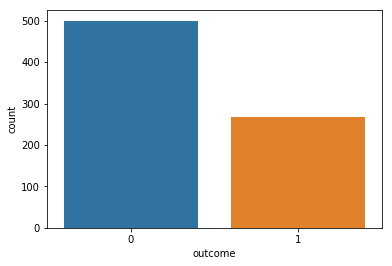

In [21]:
#import seaborn for visualization
import seaborn as sns
sns.countplot(diabetes['outcome'],label="Count")

In [22]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 768 entries, nan to nan
Data columns (total 9 columns):
pregnancy                   768 non-null int64
glucose                     768 non-null int64
bloodpressure               768 non-null int64
skinthickness               768 non-null int64
insulin                     768 non-null int64
bmi                         768 non-null float64
diabetispedigreefunction    768 non-null float64
age                         768 non-null int64
outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 80.0 KB


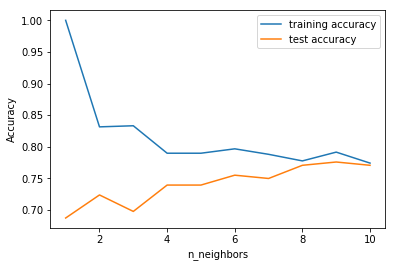

In [24]:
# spliting training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'outcome'], diabetes['outcome'], stratify=diabetes['outcome'], random_state=66)
#knn model
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [26]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.78


In [27]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.781
Test set score: 0.771


In [33]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.700
Test set accuracy: 0.703


In [34]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set accuracy: 0.785
Test set accuracy: 0.766


In [28]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.714


In [29]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.773
Accuracy on test set: 0.740


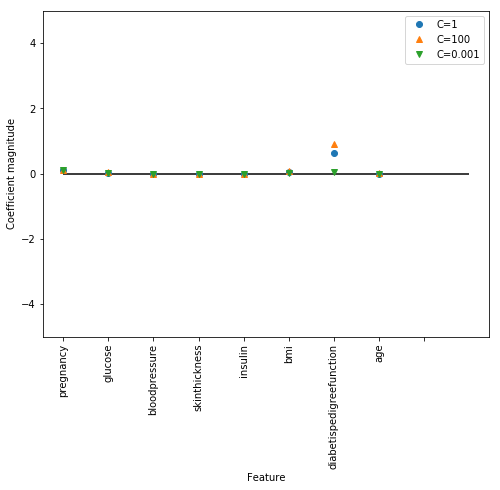

In [35]:
diabetes_features = [x for i,x in enumerate(diabetes.columns) if i!=8]
plt.figure(figsize=(8,6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(diabetes.shape[1]), diabetes_features, rotation=90)
plt.hlines(0, 0, diabetes.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')

In [30]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


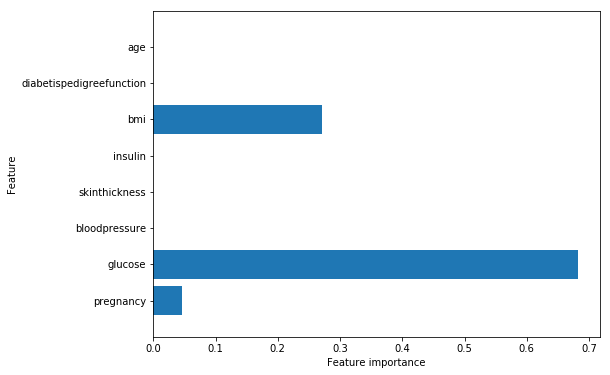

In [36]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree)
plt.savefig('feature_importance')

In [37]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.786


In [38]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 0.800
Accuracy on test set: 0.755


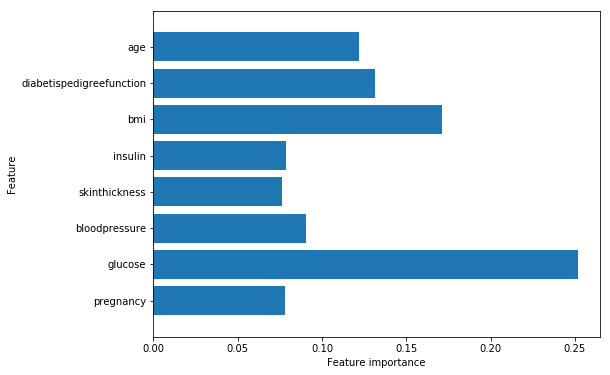

In [39]:
plot_feature_importances_diabetes(rf)
